In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np


import networkx as nx


In [146]:
import random
from itertools import combinations

edges = []
for (u, v) in combinations(range(10), 2):
    r = random.random()
    if r < 0.5:
        edges.append((u, v))
        
for (u, v) in combinations(range(8), 2):
    r = random.random()
    if r < 0.5:
        edges.append((u+10, v+10))

for (u, v) in combinations(range(9), 2):
    r = random.random()
    if r < 0.6:
        edges.append((u+18, v+18))
        
for (u, v) in combinations(range(5), 2):
    r = random.random()
    if r < 0.4:
        edges.append((u+27, v+27))
        
for (u, v) in combinations(range(6), 2):
    r = random.random()
    if r < 0.1:
        edges.append((u, v+10))

for (u, v) in combinations(range(7), 2):
    r = random.random()
    if r < 0.3:
        edges.append((u, v+18))

for (u, v) in combinations(range(6), 2):
    r = random.random()
    if r < 0.2:
        edges.append((u, v+27))
        
        
print  len(edges)
test = nx.Graph()
test.add_edges_from(edges)

76
[(0, 1), (0, 3), (0, 6), (0, 7), (0, 8), (0, 28), (1, 32), (1, 2), (1, 3), (1, 4), (1, 8), (1, 9), (1, 24), (2, 3), (2, 4), (2, 5), (2, 7), (2, 14), (2, 22), (2, 31), (3, 32), (3, 8), (3, 23), (3, 24), (4, 5), (4, 6), (4, 8), (4, 9), (4, 23), (5, 9), (7, 9), (8, 9), (10, 16), (10, 17), (10, 13), (10, 15), (11, 16), (11, 12), (11, 14), (11, 15), (12, 17), (12, 14), (14, 16), (15, 17), (16, 17), (18, 25), (18, 19), (18, 21), (18, 22), (19, 21), (19, 22), (19, 24), (19, 25), (19, 26), (20, 24), (20, 25), (20, 21), (20, 22), (20, 23), (21, 23), (21, 24), (21, 25), (21, 26), (22, 24), (22, 25), (23, 25), (24, 25), (24, 26), (25, 26), (27, 29), (27, 31), (28, 29), (28, 30), (29, 30), (29, 31), (30, 31)]


In [148]:
fp = file('dataset'+str(len(test))+'.txt', 'w')
for (u, v) in edges:
    fp.write('%d %d\n' % (u, v))
fp.close()

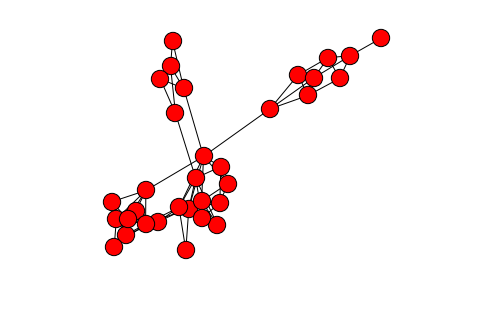

In [206]:
nx.draw(test,  with_label = True)

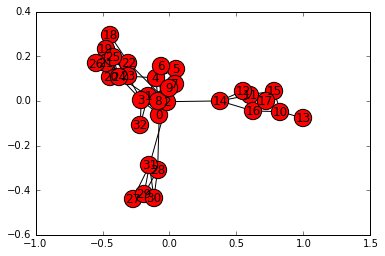

In [231]:
pos = nx.spring_layout(test)
nx.draw_networkx(test, pos=pos)

In [5]:
added = {}

In [65]:
def initializeCommunities(g, k, S):
    for v in g.nodes():
        neighbors = g.neighbors(v)
        if  len(neighbors) >= k:
            S[v] = set(neighbors)
            S[v].add(v)
            added[v] = set(neighbors)
            #S.add(v)

        

In [118]:
def zeta(v, S, g, k):
    neighbors = set(g.neighbors(v)).intersection(S)
    return 1.0*(len(neighbors)-k+1)/(len(S) - k) if len(neighbors) > k else 0
    
def xi(v, S, g):
    neighbors = set(g.neighbors(v))    
    return 1.0 * len(neighbors.intersection(S)) / len(neighbors)
    
def psi(C, Cdot):
    return 1.0 * len(C.intersection(Cdot)) / min(len(C), len(Cdot))

def findStayOff(temp):
    anchor = 0
    mark = 0
    for e in range(len(temp)-1, 0, -1):
        if not mark and temp[e]:
            mark = temp[e]

        if temp[e-1] > temp[e] and temp[e] < mark:
            anchor = e
            break
    return anchor

In [119]:
temp = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
print findStayOff(temp)

7


In [8]:
def computeScoreAndStayOff(S, v, g, k):
    count = max(20, len(g.neighbors(v)))
    ratio = 1.0 / count
    zeta_list = [0] * (count+1)
    data = {}
    
    score = zeta(v, S[s], g, k)
    if score > 0:
        data[s] = score
        bucket = int(score / ratio)
        zeta_list[bucket] += 1
        
        #if score > 0:
          #  print score, len(set(g.neighbors(v)).intersection(S[s])), len(S[s]), bucket       
    
    anchor = findStayOff(zeta_list)

    data['cutoff'] = (anchor-1) * ratio
    return data
        

IndentationError: unexpected indent (<ipython-input-8-a2d52df34c17>, line 7)

In [63]:
def duplicationRemovel(S, ovl):
    delete_list = []
    
    for (s1, s2) in combinations(S.keys(), 2):
        if psi(S[s1], S[s2]) > ovl and s1 not in delete_list and s2 not in delete_list:
            delete_list.append(s2)
    print 'duplicate', delete_list, len(delete_list)
    for e in delete_list:
        S.pop(e)
    return S

In [124]:
def selectBucket(scores_list, count):
    ratio = 1.0 / count
    bucket_list = [0] * (count+1)
    for e in scores_list:
        bucket = int(e / ratio)
        bucket_list[bucket] += 1
    anchor = findStayOff(bucket_list)
    #print scores_list, bucket_list, anchor
    return anchor

In [120]:
print selectBucket([0, 1.0], 20)

[0, 1.0] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 1
1


In [127]:
def computeZetaList(S, g, k):
    zeta_scores = {}
    for i in S:
        for vj in S[i]:
            score = zeta(vj, S[i], g, k)
            if vj not in zeta_scores:
                zeta_scores[vj] = {}
            zeta_scores[vj][i] = score
            
   # for vj in zeta_scores:
    #    print vj, zeta_scores[vj], g.neighbors(vj)
    return zeta_scores

In [149]:
S = {}
initializeCommunities(test, 2, S)
S = duplicationRemovel(S, 0.6)
#for n in S:
#    print n, S[n]



duplicate [6, 8, 32, 3, 4, 5, 7, 9, 15, 17, 12, 14, 19, 21, 22, 24, 25, 23, 29, 30, 31] 21


In [150]:
zeta_scores = computeZetaList(S, test, 2)
for v in zeta_scores:
    count = max(20, len(test.neighbors(v)))
    anchor = selectBucket(zeta_scores[v].values(), count)
    print v, zeta_scores[v], anchor
    zeta_scores[v]['cutoff'] = anchor * 1.0 / count
    


0 {0: 1.0, 1: 0.2857142857142857, 28: 0} 6
1 {0: 0.4, 1: 1.0, 2: 0.2857142857142857} 9
2 {1: 0.2857142857142857, 2: 1.0} 6
3 {0: 0.4, 1: 0.7142857142857143, 2: 0} 9
4 {1: 0.42857142857142855, 2: 0.2857142857142857} 6
5 {2: 0} 0
6 {0: 0} 0
7 {0: 0, 2: 0} 0
8 {0: 0.4, 1: 0.5714285714285714} 9
9 {1: 0.2857142857142857} 0
10 {16: 0, 10: 1.0} 1
11 {16: 0, 11: 1.0} 1
12 {11: 0} 0
13 {10: 0} 0
14 {16: 0, 2: 0, 11: 0.6666666666666666} 1
15 {10: 0, 11: 0} 0
16 {16: 1.0, 10: 0, 11: 0} 1
17 {16: 0, 10: 0.6666666666666666} 1
18 {18: 1.0} 0
19 {18: 1.0, 26: 1.0} 0
20 {20: 1.0} 0
21 {18: 0.6666666666666666, 20: 0.75, 26: 1.0} 16
22 {2: 0, 20: 0.5, 18: 0.6666666666666666} 11
23 {20: 0.5} 0
24 {1: 0, 26: 1.0, 20: 0.75} 16
25 {18: 1.0, 20: 1.0, 26: 1.0} 0
26 {26: 1.0} 0
27 {27: 0} 0
28 {0: 0, 28: 1.0} 1
29 {27: 0, 28: 0} 0
30 {28: 0} 0
31 {2: 0, 27: 0} 0
32 {1: 0} 0


In [193]:

def leaveCommunities(S, g, k, ovl):
    
    S = duplicationRemovel(S, ovl)
        
    zeta_scores = computeZetaList(S, g, k)
            
    for v in zeta_scores:
        count = max(20, len(g.neighbors(v)))
        anchor = selectBucket(zeta_scores[v].values(), count)
        zeta_scores[v]['cutoff'] = (anchor-1) * 1.0 / count    
    
    
    delete_list = []
    leave = 1
    
    for s in S:    
        for n in added[s]:
            if n not in S[s]:
                continue
            if n == s:
                continue
            if (n not in zeta_scores or s not in zeta_scores[n]) and n in S[s]:
                S[s].remove(n)
            if zeta_scores[n][s] < zeta_scores[n]['cutoff'] or zeta_scores[n]['cutoff'] == 0:
                S[s].remove(n)
            #print stay_cut_set[n][s]
        if len(S[s]) < k:
            delete_list.append(s)
            leave = 0
            
    for e in delete_list:
        S.pop(e)
    print 'after leave is: '
    for e in S:
        print e, S[e]
    return leave

In [197]:
def expandCommunities(S, g):

    join_scores = {}
    for j in g.nodes():
        if j not in join_scores:
            join_scores[j] = {}
        for i in S:
            score = xi(j, S[i], g)    
            join_scores[j][i] = score

    for v in join_scores:
        count = max(20, len(g.neighbors(v)))
        anchor = selectBucket(join_scores[v].values(), count)
        join_scores[v]['cutoff'] = (anchor-1) * 1.0 / count
    
    #for e in join_scores:
     #   print e, join_scores[e]
    #for e in added:
    #    print e, added[e]
    
    nowadded = {}
    for i in S:
        nowadded[i] = set()
        for vj in added[i]:
            for uk in g.neighbors(vj):
                if uk not in join_scores or i not in join_scores[uk]:
                    #print 'not in' , uk, i, uk not in join_scores, i not in join_scores[uk]
                    continue
                if join_scores[uk][i] > join_scores[uk]['cutoff'] and uk not in S[i]:
                    S[i].add(uk)
                    nowadded[i].add(uk)
        added[i] = nowadded[i]
    print 'after expand is: '
    for e in S:
        print e, S[e]    


In [189]:
t = {}
#for e in added:
 #   print e, added[e]
initializeCommunities(test, 2, t)
leaveCommunities(t, test, 2, 0.6)
#for e in added:
 #   print e, added[e]
S = {0: set([0, 1, 3, 6, 7, 8]), 1: set([0, 32, 2, 3, 4, 1, 8, 9]), 2: set([2, 4, 5, 7, 31]), 10: set([10, 13, 15]), 11: set([11, 12, 15]), 18: set([25, 18, 19, 22]), 20: set([20, 21, 22, 23, 24, 25]), 26: set([24, 25, 26, 19, 21]), 27: set([27, 29, 31]), 28: set([28, 29, 30])}
expandCommunities(S, test)
for e in S:
    print e, S[e]


duplicate [6, 8, 32, 3, 4, 5, 7, 9, 15, 17, 12, 14, 19, 21, 22, 24, 25, 23, 29, 30, 31] 21
after leave is: 
{0: set([0, 1, 3, 6, 7, 8]), 1: set([0, 32, 2, 3, 4, 1, 8, 9]), 2: set([2, 4, 5, 7, 31]), 10: set([10, 13, 15]), 11: set([11, 12, 15]), 18: set([25, 18, 19, 22]), 20: set([20, 21, 22, 23, 24, 25]), 26: set([24, 25, 26, 19, 21]), 27: set([27, 29, 31]), 28: set([28, 29, 30])}
expand phrase
0 set([0, 1, 2, 3, 32, 6, 7, 8, 9, 4])
1 set([0, 32, 2, 3, 4, 5, 6, 1, 8, 9, 7, 22, 28])
2 set([2, 4, 5, 7, 9, 30, 31])
27 set([27, 28, 29, 30, 31])
20 set([18, 19, 20, 21, 22, 23, 24, 25])
26 set([18, 19, 20, 21, 22, 24, 25, 26])
10 set([16, 17, 10, 13, 15])
11 set([11, 12, 14, 15, 16, 17])
28 set([28, 29, 30, 31])
18 set([18, 19, 21, 22, 24, 25])


In [203]:
def preferredCommunities(g, k, ovl):
    S = {}
    
    initializeCommunities(g, k, S)
    print len(S)
    expand = 6
    
    while expand:
        if expand <= 0:
            break
        expand -= 1
        leave = 1
        
        leave = leaveCommunities(S, g, k, ovl)

        expandCommunities(S, g)

    print len(S)
    return S

In [204]:

z = preferredCommunities(test, 2, 0.6)
print z.keys()

32
duplicate [6, 8, 32, 3, 4, 5, 7, 9, 15, 17, 12, 14, 19, 21, 22, 24, 25, 23, 29, 30, 31] 21
after leave is: 
0 set([0, 1, 3, 6, 7, 8])
1 set([0, 32, 2, 3, 4, 1, 8, 9])
2 set([2, 4, 5, 7, 31])
10 set([10, 13, 15])
11 set([11, 12, 15])
18 set([25, 18, 19, 22])
20 set([20, 21, 22, 23, 24, 25])
26 set([24, 25, 26, 19, 21])
27 set([27, 29, 31])
28 set([28, 29, 30])
after expand is: 
0 set([0, 1, 2, 3, 32, 6, 7, 8, 9, 4])
1 set([0, 32, 2, 3, 4, 5, 6, 1, 8, 9, 7, 22, 28])
2 set([2, 4, 5, 7, 9, 30, 31])
10 set([16, 17, 10, 13, 15])
11 set([11, 12, 14, 15, 16, 17])
18 set([18, 19, 21, 22, 24, 25])
20 set([18, 19, 20, 21, 22, 23, 24, 25])
26 set([18, 19, 20, 21, 22, 24, 25, 26])
27 set([27, 28, 29, 30, 31])
28 set([28, 29, 30, 31])
duplicate [1, 20, 26, 28] 4
after leave is: 
0 set([0, 1, 2, 3, 32, 6, 7, 8, 9, 4])
2 set([2, 4, 5, 7, 9, 31])
10 set([17, 10, 13, 15])
11 set([11, 12, 14, 15, 17])
18 set([18, 19, 21, 22, 24, 25])
27 set([27, 28, 29, 31])
after expand is: 
0 set([0, 1, 2, 3, 32, 5,

In [214]:
print z

{0: set([0, 1, 2, 3, 32, 5, 6, 7, 8, 9, 4]), 10: set([10, 13, 15, 17]), 27: set([27, 28, 29, 30, 31])}


In [217]:
colors = ['r'] * len(test.nodes())
cmap = {0:'b', 10:'yellow', 27:'g'}
for e in z:
    
    for n in z[e]:
        colors[n] = cmap[e]
print colors


['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'yellow', 'r', 'r', 'yellow', 'r', 'yellow', 'r', 'yellow', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'g', 'b']


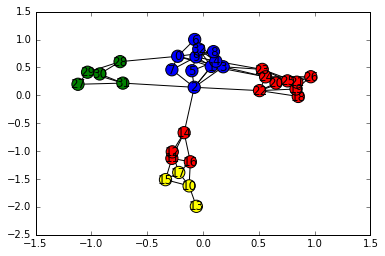

In [238]:
nx.draw_networkx(test, node_size=150, node_color=colors)

In [ ]:
data = np.loadtxt('../dataset/com-dblp.ungraph.txt', dtype=np.int32, delimiter='\t')

In [52]:


G = nx.Graph()
G.add_edges_from(data)
g = nx.adjacency_matrix(G)

NameError: name 'data' is not defined